# <center> <u>Fraud Check Random Forest Solutions</u>

### <u>Importing the Libraries: </u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [35]:
# reading the file and changing tax_income to Good and Risky
fraud = pd.read_csv("Fraud_check.csv")

##Converting the Taxable income variable to bucketing. 
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [3]:
##Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [4]:
# renaming the columns of fraud table for better access
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [5]:
# Label Encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [6]:
##Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [7]:
## Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [36]:
##Model building
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [37]:
model.n_features_

5

In [38]:
model.oob_score_

0.7166666666666667

In [16]:
# model predicting
prediction = model.predict(x_train)

In [17]:
# accuracy of the trained set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [18]:
np.mean(prediction == y_train)

0.9916666666666667

In [19]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [20]:
# predicting on test data
pred_test = model.predict(x_test)

In [21]:
# accuracy of test set
acc_test =accuracy_score(y_test,pred_test)

In [22]:
acc_test

0.7333333333333333

In [48]:
# creating the decision tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

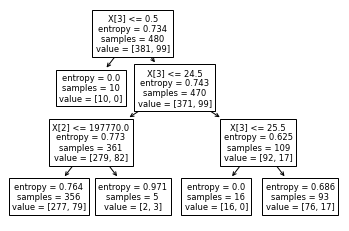

In [49]:
#PLot the decision tree
tree.plot_tree(model);

In [50]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'income']

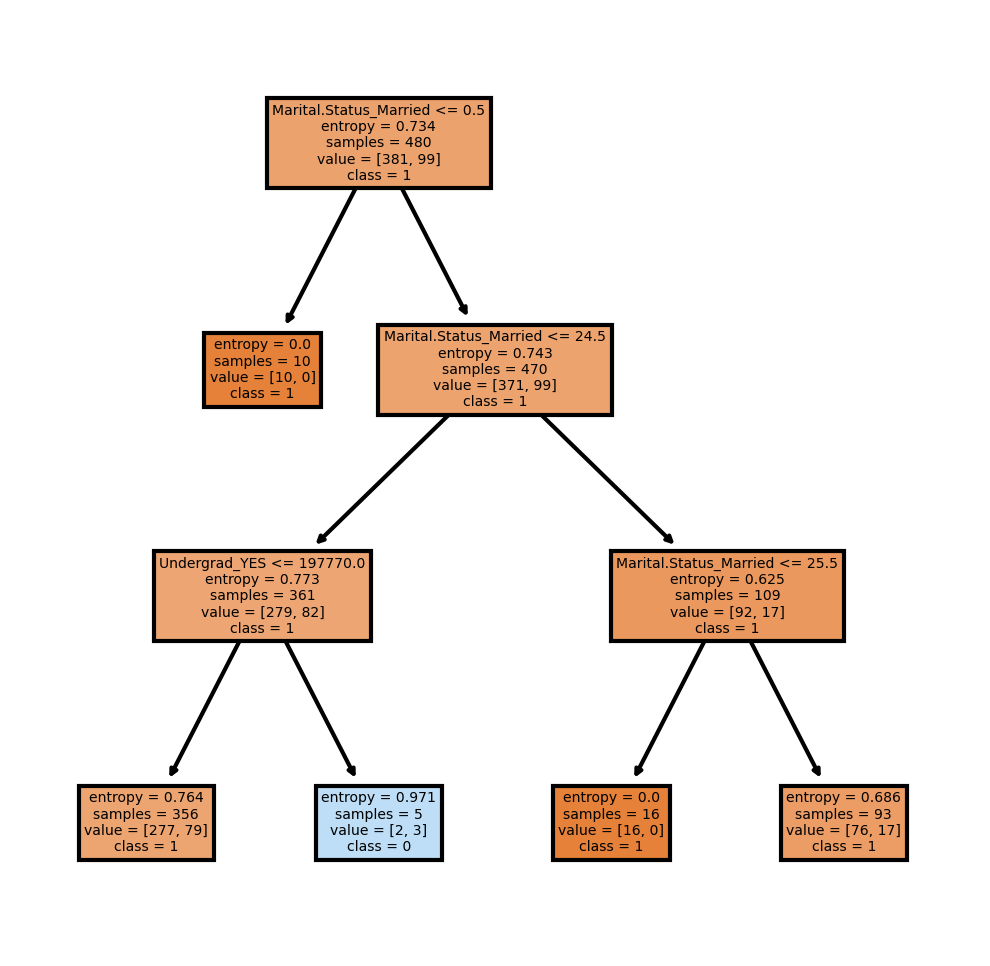

In [51]:
import matplotlib.pyplot as plt
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [52]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [53]:
pd.crosstab(y_test,preds)

col_0,0
income,
0,95
1,25


In [54]:
# Accuracy 
np.mean(preds==y_test)

0.7916666666666666

In [55]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7916666666666666